# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Deep Learning Frameworks</font>

## Redes Neurais Artificiais Profundas

Vamos criar a mesma rede neural usando alternativas diferentes. Uma excelente forma de comparar como diferentes bibliotecas permitem a criação de um modelo de rede neural. Usaremos:

- TensorFlow 2 e Keras (Nível Baixo de Complexidade)
- PyTorch (Nível Médio de Complexidade)
- NumPy (Nível Alto de Complexidade)

## Arquitetura da Rede

Criaremos uma rede neural para aprender a prever dígitos escritos à mão com o dataset MNIST. Aqui um exemplo do dataset:

![](./imagens/mnist.png)

Nossa rede terá a seguinte arquitetura:

![](./imagens/rede.png)

## Defininindo o Dataset

Para este passo a passo, vamos nos concentrar na importação do conjunto de dados MNIST e usá-lo como entrada para nossas redes neurais profundas. 

Para cada biblioteca vamos carregar os dados usando o que elas oferecem. 

## TensorFlow 2.0 e Keras

Vamos começar pelo mais fácil!

Vejamos com que facilidade podemos construir uma rede no TensorFlow (com Keras).

Com o TensorFlow e o Keras, não precisamos pensar muito nas funções de ativação, otimizadores etc., pois elas já estão implementados. Além disso, o tempo de execução costuma ser menor para executar e treinar uma rede neural, uma vez que as estruturas são completamente otimizadas em comparação com o NumPy, por exemplo.

In [ ]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

In [2]:
# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip3 install -q -U watermark

In [13]:
# Imports
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import matplotlib
import keras

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

tensorflow: 2.8.0
sys       : 3.7.12 (default, Jan 15 2022, 18:48:18) 
[GCC 7.5.0]
IPython   : 5.5.0
matplotlib: 3.2.2
keras     : 2.8.0



In [5]:
# Carrega os dados (treino e teste)
(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
x_treino.shape

(60000, 28, 28)

In [7]:
x_teste.shape

(10000, 28, 28)

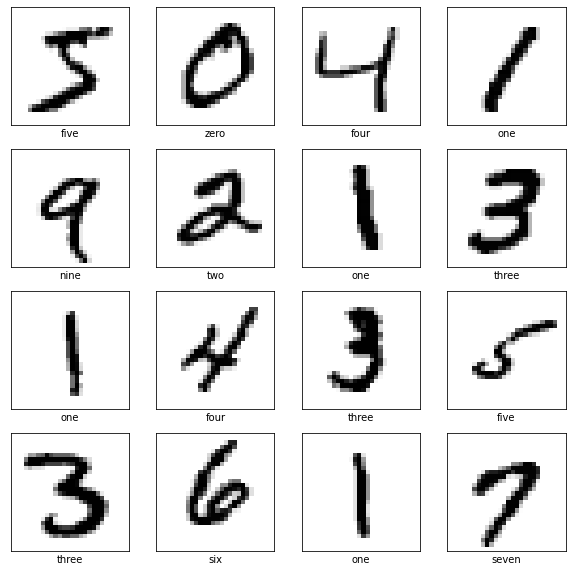

In [8]:
# Exemplos de imagens

# Nomes das classes
class_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

# Plot
plt.figure(figsize = (10,10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_treino[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[y_treino[i]])
plt.show()

In [9]:
# Prepara os dados de treino

# Separa X e Y e Normaliza X
x_treino = x_treino.astype('float32') / 255
y_treino = to_categorical(y_treino)

In [14]:
# Cria o modelo
modelo_tf = tf.keras.Sequential([Flatten(input_shape = (28, 28)), 
                                 Dense(128, activation = 'relu'),
                                 Dropout(0.2),
                                 Dense(64, activation = 'relu'),
                                 Dropout(0.5),
                                 Dense(10, activation = 'softmax')
])

In [15]:
# Compila o modelo
modelo_tf.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [16]:
# Treina o modelo
modelo_tf.fit(x_treino, y_treino, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4358 - accuracy: 0.8723
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2113 - accuracy: 0.9408
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1634 - accuracy: 0.9541
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1452 - accuracy: 0.9588
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1283 - accuracy: 0.9642
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1171 - accuracy: 0.9669
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1066 - accuracy: 0.9689
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1003 - accuracy: 0.9703
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0913 - accuracy: 0.9735
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.087

In [17]:
# Sumário do modelo
modelo_tf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-tr

In [18]:
# Prepara os dados de teste

# Separa X e Y e Normaliza X
x_teste = x_teste.astype('float32') / 255
y_teste = to_categorical(y_teste)

# Ajusta o shape de X (apenas se necesssário)
# x_teste = x_teste.reshape((-1, 28, 28))

# Ajusta o shape de y (apenas se necesssário)
# y_teste = y_teste.reshape((-2, 10))

In [19]:
x_teste.shape

(10000, 28, 28)

In [20]:
y_teste.shape

(10000, 10)

In [21]:
previsoes = modelo_tf.predict(x_teste)
print(previsoes)

[[1.8154771e-14 1.1296473e-09 9.2886854e-09 ... 9.9999988e-01
  8.6516549e-12 2.1884357e-09]
 [2.7165466e-13 2.2063130e-06 9.9999547e-01 ... 3.5065611e-08
  8.1513193e-08 4.1026565e-13]
 [1.0657633e-12 9.9999964e-01 2.5037612e-09 ... 1.4153099e-08
  4.6866461e-08 3.1107361e-10]
 ...
 [5.9184272e-18 4.9747874e-13 2.9118329e-15 ... 3.6703092e-11
  2.0329832e-13 3.1404586e-08]
 [6.9724581e-21 1.9264198e-21 1.4316625e-24 ... 1.6160177e-23
  1.1133021e-11 5.5458266e-14]
 [1.8937759e-15 1.8887219e-19 2.1348068e-17 ... 2.0585303e-23
  2.5014393e-15 5.1274409e-20]]


In [22]:
# Avalia o modelo

# Calcula a acurácia
teste_loss, teste_accuracy = modelo_tf.evaluate(x_teste,  y_teste, verbose = 2)

# Print
print('\nAcurácia com Dados de Teste = {0:.2f}%'.format(teste_accuracy * 100.0))

313/313 - 1s - loss: 0.0879 - accuracy: 0.9779 - 959ms/epoch - 3ms/step

Acurácia com Dados de Teste = 97.79%


Esse foi o processo executado durante o treinamento da rede:

![](./imagens/nn.png)

## PyTorch

O PyTorch é mais um framework popular para cálculos, e é amplamente usado na comunidade de pesquisa. No PyTorch, você ainda precisa fazer muito trabalho alinhando todas as dimensões dos dados e especificando as camadas e a passagem direta de maneira exata. Isso não é algo ruim e é muito mais fácil personalizar os componentes de uma rede neural.

In [ ]:
!pip install -q torchvision

In [24]:
# Imports
import time
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [25]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

tensorflow : 2.8.0
sys        : 3.7.12 (default, Jan 15 2022, 18:48:18) 
[GCC 7.5.0]
IPython    : 5.5.0
matplotlib : 3.2.2
numpy      : 1.21.5
torchvision: 0.11.1+cu111
keras      : 2.8.0
torch      : 1.10.0+cu111



Antes de fazer o download dos dados, vamos definir quais são as transformações que queremos executar em nossos dados antes de inseri-los no pipeline. Em outras palavras, você pode considerar que é algum tipo de edição personalizada em execução nas imagens, para que todas as imagens tenham as mesmas dimensões e propriedades. Fazemos isso usando torchvision.transforms.

transforms.ToTensor () - converte a imagem em números, que são compreensíveis pelo sistema. Ele separa a imagem em três canais de cores (imagens separadas): vermelho, verde e azul. Em seguida, converte os pixels de cada imagem no brilho de suas cores entre 0 e 255. Esses valores são reduzidos para um intervalo entre 0 e 1. A imagem agora é um tensor pyTorch.

transforms.Normalize () - normaliza o tensor com uma média e um desvio padrão que variam conforme os dois parâmetros, respectivamente.

In [26]:
# Função para transformar os dados ao carregar
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

Agora baixamos os conjuntos de dados, embaralhamos e transformamos cada um deles. Fazemos o download dos conjuntos de dados e os carregamos no DataLoader, que combina o conjunto de dados e um amostrador e fornece iteradores de processo único ou multiprocessos sobre o conjunto de dados.

In [27]:
# Carrega os dados de treino
dados_treino = torch.utils.data.DataLoader(datasets.MNIST('dados', 
                                                          train = True, 
                                                          download = True, 
                                                          transform = transform),
                                                          batch_size = 64, 
                                                          shuffle = True)

Failed to download (trying next):
<urlopen error [Errno 99] Cannot assign requested address>



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting dados/MNIST/raw/train-images-idx3-ubyte.gz to dados/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 99] Cannot assign requested address>



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting dados/MNIST/raw/train-labels-idx1-ubyte.gz to dados/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 99] Cannot assign requested address>




KeyboardInterrupt: 

In [ ]:
# Carrega os dados de teste
dados_teste = torch.utils.data.DataLoader(datasets.MNIST('dados', 
                                                         train = False, 
                                                         transform = transform),
                                                         batch_size = 64, 
                                                         shuffle = True)

Em uma linha, o tamanho do lote é o número de imagens que queremos ler de uma só vez.

In [ ]:
# Visualizando a dimensão dos dados de treino
dataiter = iter(dados_treino)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

O formato das imagens torch.Size ([64,1,28,28]), o que sugere que existem 64 imagens em cada lote e cada imagem tem uma dimensão de 28 x 28 pixels. Da mesma forma, os rótulos têm a forma de torch.Size ([64]). Adivinha por que? - Sim, você está certo! 64 imagens devem ter 64 rótulos, respectivamente. É isso aí. Fácil!

In [ ]:
# Visualizando uma imagem
plt.imshow(images[0].numpy().squeeze(), cmap = 'gray_r');

In [ ]:
# Visualizando várias imagens
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap = 'gray_r')

In [ ]:
# Hiperparâmetros da rede
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

In [ ]:
# Modelo
modelo_pt = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),  # 784 x 128
                          nn.ReLU(),
                          nn.Linear(hidden_sizes[0], hidden_sizes[1]),  # 128 x 64
                          nn.ReLU(),
                          nn.Linear(hidden_sizes[1], output_size),  # 64 x 10
                          nn.LogSoftmax(dim = 1))

In [ ]:
print(modelo_pt)

O nn.Sequential envolve as camadas na rede. Existem três camadas lineares com a ativação ReLU (uma função simples que permite a passagem de valores positivos, enquanto valores negativos são modificados para zero). A camada de saída é uma camada linear com a ativação LogSoftmax porque este é um problema de classificação.

Tecnicamente, uma função LogSoftmax é o logaritmo de uma função Softmax como o nome indica e se parece com isso, conforme mostrado abaixo.

![](./imagens/logsoftmax.png)

Em seguida, definimos a perda de probabilidade logarítmica negativa (**negative log-likelihood loss**). Juntos, o LogSoftmax() e o NLLLoss() atuam como a perda de entropia cruzada, conforme mostrado no diagrama da arquitetura de rede acima.

Além disso, você deve estar se perguntando por que temos 784 unidades na primeira camada. Boa! É porque achatamos cada imagem antes de enviá-la para dentro da rede neural. (28 x 28 = 784)

In [ ]:
# Função de custo do modelo
criterion = nn.NLLLoss()

# Obtendo os lotes de dados
images, labels = next(iter(dados_treino))

# Ajustando o shape
images = images.view(images.shape[0], -1)

# Logs das probabilidades de classe
logps = modelo_pt(images) 

# Perda
loss = criterion(logps, labels) 

Uma rede neural aprende iterando várias vezes nos dados disponíveis. Os termos aprendidos referem-se ao ajuste de pesos da rede para minimizar a perda. Vamos visualizar como funciona.

In [ ]:
print('\nAntes do Backward Pass: \n', modelo_pt[0].weight.grad)
loss.backward()
print('\nDepois do Backward Pass: \n', modelo_pt[0].weight.grad)

Treinamento

In [ ]:
# Otimizador
optimizer = optim.SGD(modelo_pt.parameters(), lr = 0.003, momentum = 0.9)

# Número de épocas
epochs = 10

# Loop de treinamento
for e in range(epochs):
    
    # Registra o momento de início da época
    start_time = time.time()
    
    # Zera o erro da época
    running_loss = 0
    
    # Loop pelas imagens e labels
    for images, labels in dados_treino:
        
        # Flatten das imagens MNIST
        images = images.view(images.shape[0], -1)
    
        # Passada de treinamento
        optimizer.zero_grad()
        
        output = modelo_pt(images)
        loss = criterion(output, labels)
        
        # Aqui acontece o aprendizado como backpropagation
        loss.backward()
        
        # E aqui otimiza os pesos
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print('Epoch: {0}, Tempo Gasto: {1:.2f}s, Loss(Erro): {2}'.format(e, 
                                                                          time.time() - start_time, 
                                                                          running_loss / len(dados_treino)))

Avaliação e teste

In [ ]:
# Função para visualizar a classificação
def visualiza_classe(img, ps):
    ps = ps.data.numpy().squeeze()
    fig, (ax1, ax2) = plt.subplots(figsize = (6,9), ncols = 2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Probabilidade de Classe')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

In [ ]:
# Obtém uma imagem de teste
images, labels = next(iter(dados_teste))

# Ajusta a imagem
img = images[0].view(1, 784)

# Faz previsão com a imagem
with torch.no_grad():
    logps = modelo_pt(img)

# Log de probabilidade da previsão
ps = torch.exp(logps)
probab = list(ps.numpy()[0])

# Print
print("Dígito Previsto =", probab.index(max(probab)))

# Visualiza classe
visualiza_classe(img.view(1, 28, 28), ps)

Agora, iteramos pelo conjunto de teste usando um loop for e calculamos o número total de previsões corretas. É assim que podemos calcular a precisão.

In [ ]:
# Avaliando o modelo
correct_count, all_count = 0, 0
for images,labels in dados_teste:
    for i in range(len(labels)):
        img = images[i].view(1, 784)
        with torch.no_grad():
            logps = modelo_pt(img)

        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label == pred_label):
            correct_count += 1
        all_count += 1

print("\nNúmero de Imagens Testadas =", all_count)
print("Acurácia nos Dados de Teste =", (correct_count/all_count))

In [ ]:
# Salvando o modelo
torch.save(modelo_pt, 'modelos/modelo_pt.pt') 

# NumPy

Essa é a mais difícil de implementar, pois teremos que programar a maior parte das operações básicas para que essa abordagem funcione. Comparativamente, o TensorFlow e o PyTorch são muito mais fáceis.

In [28]:
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor. Vamos desativar isso.
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports
import sklearn
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

tensorflow : 2.8.0
sklearn    : 0.0
sys        : 3.7.12 (default, Jan 15 2022, 18:48:18) 
[GCC 7.5.0]
IPython    : 5.5.0
matplotlib : 3.2.2
numpy      : 1.21.5
ipykernel  : 4.10.1
torchvision: 0.11.1+cu111
keras      : 2.8.0
torch      : 1.10.0+cu111
pandas     : 1.3.5



In [30]:
# Carregando o MNIST com Scikit-Learn
mnist = load_digits()
X, y = mnist["data"], mnist["target"]

In [31]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [32]:
y

array([0, 1, 2, ..., 8, 9, 8])

### Vamos Usar Dados Customizados

Embora você possa usar os dados acima, vamos trabalhar com dados customizados.

Os arquivos de dados train.csv e test.csv contêm imagens em escala de cinza de dígitos desenhados à mão, de zero a nove.

Cada imagem tem 28 pixels de altura e 28 pixels de largura, totalizando 784 pixels no total. Cada pixel tem um único valor de pixel associado, indicando a claridade ou a escuridão desse pixel, com números mais altos significando mais escuros. Esse valor de pixel é um número inteiro entre 0 e 255, inclusive.

O conjunto de dados de treinamento (train.csv) possui 785 colunas. A primeira coluna, chamada "label", é o dígito que foi desenhado pelo usuário. O restante das colunas contém os valores de pixel da imagem associada.

Cada coluna de pixel no conjunto de treinamento tem um nome como pixelx, em que x é um número inteiro entre 0 e 783, inclusive. Para localizar esse pixel na imagem, suponha que decompusemos x como x = i * 28 + j, onde iej são números inteiros entre 0 e 27, inclusive. Então pixelx está localizado na linha ie coluna j de uma matriz 28 x 28 (indexação por zero).

Por exemplo, pixel31 indica o pixel que está na quarta coluna da esquerda e a segunda linha da parte superior, como no diagrama ascii abaixo.

Os datasets foram extraídos do Kaggle: https://www.kaggle.com/c/digit-recognizer/

Essa competição é do tipo on-going, ou seja, está sempre ativa e você pode submeter sua solução e o Kaggle faz a avaliação.

In [33]:
# Carregando os dados
treino = pd.read_csv('dados/train.csv')
teste = pd.read_csv('dados/test.csv')

In [34]:
treino.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
teste.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# Separando a classe nos dados de treino
range_class = np.arange(10)
y = np.asfarray(treino.iloc[:,0])

# Ajustando os datasets
treino_x = treino.iloc[:,1:].values
treino_y = np.array([(range_class == label).astype('float') for label in y])

In [38]:
# Ajustando os dados para teste
teste_x = teste.values

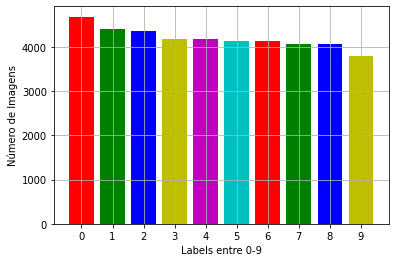

In [39]:
# Visualizando os Dados
y = treino.iloc[:,0].value_counts()
x = range(len(y))
plt.bar(x, y, color = 'rgbymc')
plt.xticks(x, x)
plt.ylabel('Número de Imagens')
plt.xlabel('Labels entre 0-9')
plt.grid()

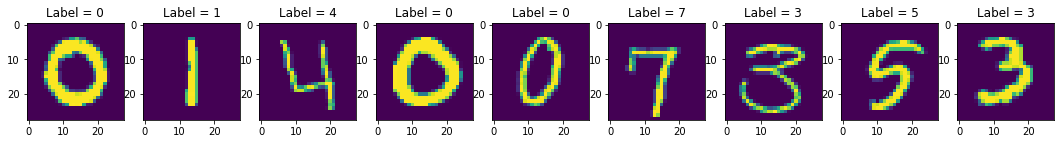

In [40]:
# Criando uma figura para exibir imagens em padrão de linhas e colunas (1 x 10)
figure = plt.figure()

# Definir manualmente a largura e a altura da figura
figure.set_size_inches(20.5, 8.5)

# Configurando uma imagem em cada figura com um título para o rótulo da imagem
for itr in range(1, 10):
    plt.subplot(1, 10, itr)
    label = treino.loc[itr,'label']
    pixels = treino.iloc[itr,1:].values.reshape((28,28))
    plt.title('Label = {label}'.format(label = label))
    plt.imshow(pixels)

# Exibindo toda a imagem presente na figura
plt.show()

In [41]:
# Normalizando os Dados de entrada x
treino_x = treino_x / 255.
teste_x  = teste_x  / 255.

In [42]:
# Visualizando o formato dos dados
shape_x = treino_x.shape
shape_y = treino_y.shape

# Total de linhas (observações ou exemplos)
total = treino_y.shape[0]

# Print
print ('O shape de X é: ' + str(shape_x))
print ('O shape de Y é: ' + str(shape_y))
print ('Temos %d exemplos de treinamento!' % (total))

O shape de X é: (42000, 784)
O shape de Y é: (42000, 10)
Temos 42000 exemplos de treinamento!


### Definindo a Rede

Tamanho das camadas.

In [43]:
def layer_size(X, Y):
    
    n_x = X.shape[1]
    n_h = 4
    n_y = Y.shape[1]
    
    return (n_x, n_h, n_y)

Inicialização dos parâmetros.

In [44]:
def initialise_parameter(n_x, n_h, n_y):
    
    np.random.seed(0)
    
    W1 = np.random.randn(n_h[0], n_x) * 0.1
    b1 = np.zeros(shape = (n_h[0], 1))
    
    W2 = np.random.randn(n_h[1], n_h[0]) * 0.1
    b2 = np.zeros(shape = (n_h[1], 1))
    
    W3 = np.random.randn(n_y, n_h[1]) * 0.1
    b3 = np.zeros(shape = (n_y, 1))
    
    assert(W1.shape == (n_h[0], n_x))
    assert(b1.shape == (n_h[0], 1))

    assert(W2.shape == (n_h[1], n_h[0]))
    assert(b2.shape == (n_h[1], 1))
    
    assert(W3.shape == (n_y, n_h[1]))
    assert(b3.shape == (n_y, 1))
    
    parameters = {"W1": W1, 
                  "b1": b1, 
                  "W2": W2, 
                  "b2": b2, 
                  "W3": W3, 
                  "b3": b3
                 }
    
    return parameters

![](./imagens/nn.png)

Função de Ativação.

In [45]:
# Função sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

Uma função sigmóide é uma função real limitada, diferenciável e definida para todos os valores reais de entrada e possui uma derivada não negativa em cada ponto. Uma "função" sigmóide e uma "curva" sigmóide referem-se ao mesmo objeto.

Uma função sigmóide é um tipo de função de ativação, e mais especificamente definida como uma função de "esmagamento". As funções de esmagamento limitam a saída a um intervalo entre 0 e 1, tornando essas funções úteis na previsão de probabilidades.

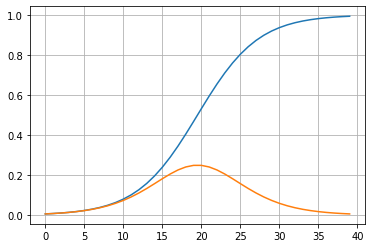

In [46]:
# Representação gráfica da função sigmoide
_x = np.linspace(-5, 5, 40)
plt.plot(sigmoid(_x))
plt.plot(sigmoid_derivative(sigmoid(_x)))
plt.grid()

Forward Propagation.

In [47]:
def forward_propagation(X, parameters):
    
    # Coleta os parâmetros do dicionário parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # Camada de entrada
    Z1 = (np.dot(W1, X.T) + b1).T
    
    # Função de Ativação
    A1 = sigmoid(Z1)
    
    # Camada oculta 1
    Z2 = (np.dot(W2, A1.T) + b2).T
    
    # Função de Ativação
    A2 = sigmoid(Z2)
    
    # Camada oculta 2 
    Z3 = (np.dot(W3, A2.T) + b3).T
    
    # Função de Ativação
    # Como vai entregar as probabilidades, não precisamos de uma camada de saída
    A3 = sigmoid(Z3)
    
    assert(A3.shape == (X.shape[0], 10))
    
    cache = {
        "Z1" : Z1,
        "A1" : A1,
        "Z2" : Z2,
        "A2" : A2,
        "Z3" : Z3,
        "A3" : A3
    }

    return A3, cache

Função de Custo.

In [48]:
def compute_cost(A3, Y):
    
    # Número de linhas de Y
    m = Y.shape[0] 
    
    # Log das probabilidades das previsões
    logprobs = np.multiply(Y, np.log(A3)) + np.multiply((1 - Y), np.log(1 - A3))
    
    # Cálculo do custo
    cost = - np.sum(logprobs) / m
    
    # Ajuste do formato dos dados
    cost = float(np.squeeze(cost))
    
    assert(isinstance(cost, float))
    
    return cost

Backward Propagation (Backpropagation).

In [49]:
def backward_propagation(parameters, cache, X, Y):
    
    # Shape de Y
    m = Y.shape[0]
    
    # Extrai do "cache" os valores da saída de cada ativação
    A1 = cache["A1"]
    A2 = cache["A2"]
    A3 = cache["A3"]
    
    # Extrai os parâmetros
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    
    # Calcula a derivada do custo (perceba que estamos calculando na sequência inversa ao forward propagation)
    dZ3 = (A3 - Y)
    dW3 = (1 / m) * np.dot(dZ3.T, A2)
    db3 = (1 / m) * np.sum(dZ3, keepdims = True)

    dZ2 = np.multiply(np.dot(dZ3, W3), sigmoid_derivative(A2))
    dW2 = (1 / m) * np.dot(dZ2.T, A1)
    db2 = (1 / m) * np.sum(dZ2, keepdims = True)
    
    dZ1 = np.multiply(np.dot(dZ2, W2), sigmoid_derivative(A1))
    dW1 = (1 / m) * np.dot(dZ1.T, X)
    db1 = (1 / m) * np.sum(dZ1, keepdims = True)
    
    # Dicionário de gradientes
    grads = {"dW1": dW1, 
             "db1": db1, 
             "dW2": dW2, 
             "db2": db2, 
             "dW3": dW3, 
             "db3": db3
            }
    
    return grads

Atualização dos Coeficientes (Gradiente Descendente).

http://deeplearningbook.com.br/aprendizado-com-a-descida-do-gradiente/

No Cálculo, a derivada em um ponto de uma função y = f(x) representa a taxa de variação instantânea de y em relação a x neste ponto. Um exemplo típico é a função velocidade que representa a taxa de variação (derivada) da função espaço. Do mesmo modo, a função aceleração é a derivada da função velocidade.

No cálculo vetorial o gradiente (ou vetor gradiente) é um vetor que indica o sentido e a direção na qual, por deslocamento a partir do ponto especificado, obtém-se o maior incremento possível no valor de uma grandeza a partir da qual se define um campo escalar para o espaço em consideração. 

A derivada do custo foi calculada no Backpropagation, bem como os gradientes. 

Agora podemos atualizar os valores dos coeficientes. Um parâmetro de taxa de aprendizagem (alfa) deve ser especificado e controla o quanto os coeficientes podem mudar em cada atualização.

In [50]:
def update_parameters(parameters, grads, learning_rate):
    
    # Extrai os pesos
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # Extrai os gradientes
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    dW3 = grads["dW3"]
    db3 = grads["db3"]
    
    # Multiplica os gradientes pela taxa de aprendizagem e então subtrai do valor do coeficiente
    # O gradiente define a direção da mudança (positiva ou negativa)
    # A taxa de aprendizagem define a magnitude (mudança maior ou menor)
    W1 = W1 - (learning_rate * dW1)
    b1 = b1 - (learning_rate * db1)
    W2 = W2 - (learning_rate * dW2)
    b2 = b2 - (learning_rate * db2)
    W3 = W3 - (learning_rate * dW3)
    b3 = b3 - (learning_rate * db3)
    
    # Novo dicionário de parâmetros
    parameters = {"W1": W1, 
                  "b1": b1, 
                  "W2": W2, 
                  "b2": b2, 
                  "W3": W3, 
                  "b3": b3
                 }
    
    return parameters

Função para Previsão.

In [51]:
def predict(X, parameters):
    
    m = X.shape[0]
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    A3, cache = forward_propagation(X, parameters)
    
    return A3

Modelo da Rede Neural.

In [52]:
def nn_model(X, Y, n_h, learning_rate, num_iterations, print_cost = False):

    # Para reproduzir sempre os mesmos resultados
    np.random.seed(3)

    # Lista para o custo em cada iteração
    cost_per_iter = []
    
    # Tamanho das camadas
    n_x = layer_size(X, Y)[0]
    n_y = layer_size(X, Y)[2]
    
    # Inicialização dos parâmetros
    parameters = initialise_parameter(n_x, n_h, n_y)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation. Inputs: "X, pesos". Outputs: "A2, cache".
        A3, cache = forward_propagation(X, parameters)
        
        # Função de custo. Inputs: "A2, Y, pesos". Outputs: "custo".
        cost = compute_cost(A3, Y)
 
        # Grava o custo por iteração
        cost_per_iter.append(cost)

        # Backpropagation. Inputs: "pesos, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent. Inputs: "pesos, grads". Outputs: "pesos".
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Imprime o custo a cada 100 iterações
        if print_cost and i % 100 == 0:
            print ("Custo após iteração %i: %f" %(i, cost))
    
    # Previsão em treino
    train_prediction = (treino.iloc[:,0].values != np.array(predict(treino_x, parameters).argmax(axis = 1)).T).astype(int)

    # Previsão em teste
    test_prediction = np.vstack((np.arange(1,28001), predict(teste_x, parameters).argmax(axis = 1).T)).T
    
    # Dados para submeter ao Kaggle mais tarde (opcional)
    data_to_submit = pd.DataFrame(test_prediction, columns = ['ImageId','Label']) 
    
    # Print
    print("Acurácia em Treino: {} %".format(100 - np.mean(train_prediction) * 100))
    
    # Saída
    output = {
        "cost" : cost_per_iter[-1],
        "parameters" : parameters,
        "cost_per_iter" : cost_per_iter,
        "train_prediction" : train_prediction,
        "test_prediction" : test_prediction,
        "data_to_submit" : data_to_submit
    }
    
    return output

Treinamento.

In [53]:
models = {}
learning_rates = [2.1]

# Loop de treinamento
for i in learning_rates:
    
    # Print
    print ("Taxa de Aprendizado = " + str(i))
    
    models[str(i)] = nn_model(treino_x, 
                              treino_y, 
                              n_h = [400, 40], 
                              learning_rate = i, 
                              num_iterations = 1600, 
                              print_cost = True)
    
    
    print ("O custo é: " + str(models[str(i)]["cost"]))
    print ("-------------------------------------------------------" + '\n')

# Plot do custo por iteração
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["cost_per_iter"]), label = str(i))

# Plot
plt.ylabel('Custo')
plt.xlabel('Iterações')
legend = plt.legend(loc = 'upper center', shadow = True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.grid()
plt.show()

Taxa de Aprendizado = 2.1
Custo após iteração 0: 6.616198


KeyboardInterrupt: 

In [ ]:
# Salvando o resultado para submeter ao Kaggle
models["2.1"]["data_to_submit"].to_csv('dados/submit_2_1.csv', index = False)

# Fim